# Assignment 02

### 1. Data

- generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$ from random perturbations using `random` function based on a linear function that you define
- $\hat{y} = a x + b$ where $a, b \in \mathbb{R}$
- $y = \hat{y} + n$ where $n \sim \mathcal{N}(0, \sigma^2)$ is drawn from the normal distribution with mean $0$ and standard deviation $\sigma$
- choose $m=1000, a=2, b=1$ and $\sigma=1$

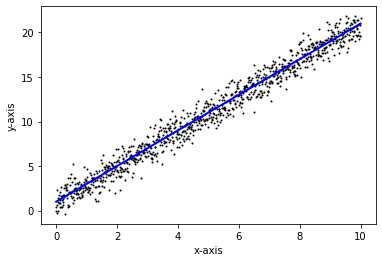

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000                
sigma = 1               

a = 2
b = 1
f = lambda x: a * x + b 

x = np.linspace(0,10,m) 
y_bar = []
y = []

for i in range(len(x)):
  y_bar.append(f(x[i]))
  y.append(f(x[i]) + np.random.normal(0,sigma**2))

plt.plot(x,y,'ko', linewidth=0, markersize=1)
plt.plot(x,y_bar,'b', linewidth=2)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


### 2. Linear Model

- $h_\theta(x) = \theta_0 + \theta_1 x$, $\quad$ where $\theta = (\theta_0, \theta_1)$ and $\theta_0, \theta_1 \in \mathbb{R}$

theta_0 = 0.9358
theta_1 = 2.0006


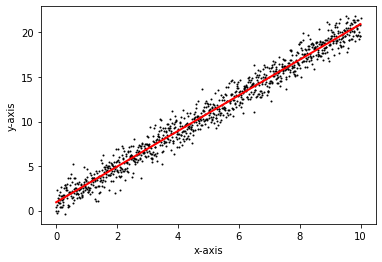

In [4]:

# fy = np.array(y)
x = np.array(x)


theta0 = (sum(y)*sum(x**2) - sum(x)*sum(x*y)) / ( m * sum(x**2) - sum(x)**2)
theta1 = (m*sum(x*y) - sum(x)*sum(y))/ ( m * sum( x**2 ) - sum(x)**2)

print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)


plt.plot(x,y,'ko', linewidth=0, markersize=1)
plt.plot(x, theta0 + theta1 * x,'r', linewidth=2)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.show()